# Final Project

# Contributions

> Stress and Sleep Analysis Project<br>
> Fall 2024 Data Science Project<br>
> Johann Thomas<br>

Project Idea, Data Curation and Preprocessing, Data Exploration and Summary Statistics, ML Algorithm Design/Development, ML Algorithm Training and
Test Data Analysis, Visualization, Insights/Conclusions, Final Tutorial Creation all done by Johann Thomas.

# Introduction

This project is meant to analyze and make conclusions on health information on many people, particularly on the effects of stress on the sleep quality
of individuals. The questions we are trying to answer are "Is there a significant relationship between a person's stress level and their quality of sleep?" and "Can the sleep quality of an individual be predicted based on their stress levels?" Answering these questions are important because it explains the health implications of high stress and the importance of mitigating it in order for people to stay healthy. This may be particularly useful for college students as they often deal with stress from classes and don't sleep as well as they should.

# Data Curation

Dataset: https://www.kaggle.com/datasets/minahilfatima12328/lifestyle-and-sleep-patterns<br>
Our dataset is a table of many individuals of different Ages and Occupations along with health information about them such as BMI, Blood Pressure,
Heart Rate, Sleep Quality, Stress Level, etc. This data has people of a variety of occupations which will make the results that are concluded from this more accurate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sleep_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
sleep_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
column_types = sleep_df.dtypes
print(column_types)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [4]:
info = sleep_df.count()
print(info)

Person ID                  374
Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             155
dtype: int64


In [5]:
sleep_df["Sleep Disorder"] = sleep_df["Sleep Disorder"].fillna("None")
sleep_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Exploratory Data Analysis

In [6]:
print(f"""The average age of a person in this dataset is {(np.floor(sleep_df["Age"].mean()).astype(int))}
with the oldest person being {np.floor(sleep_df["Age"].max().astype(int))}
and the youngest being {np.floor(sleep_df["Age"].min().astype(int))}.""")

The average age of a person in this dataset is 42
with the oldest person being 59
and the youngest being 27.


**<font color="red">All people within this dataset are between the ages of 27 and 59. This excludes people of many other age ranges whose sleep data may have been useful.</font>**

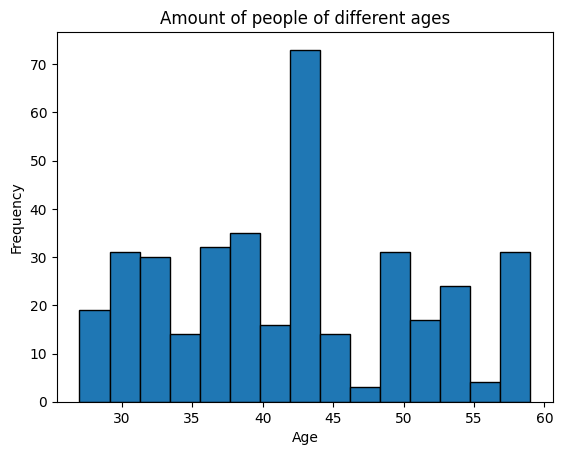

In [7]:
plt.hist(sleep_df["Age"], bins=15, edgecolor="black")
plt.title("Amount of people of different ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [8]:
print(f"Most people in this dataset are, by occupation, {sleep_df["Occupation"].mode()[0]}s.")

Most people in this dataset are, by occupation, Nurses.


**<font color="red">Most people in this dataset are nurses and hardly any of them are managers. Ideally, the data would have been collected in a way
such that participants of each of the occupations are almost equally represented.</font>**

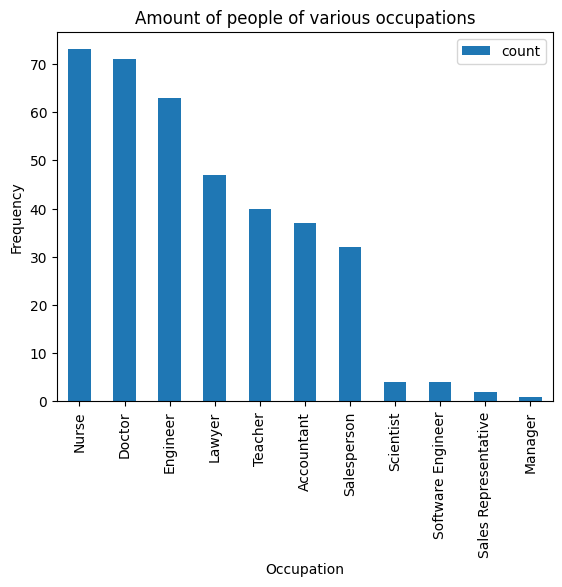

In [9]:
sleep_df["Occupation"].value_counts().plot(kind="bar")
plt.legend()
plt.title("Amount of people of various occupations")
plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.show()

# Hypothesis Testing

**<font color="Black">
    H0: Stress Level does not have an effect on sleep quality\
    H1: Stress Level does have an effect on sleep quality
</font>**

In [10]:
table = pd.crosstab(sleep_df["Stress Level"], sleep_df["Quality of Sleep"])
print(table)

Quality of Sleep  4  5   6   7   8   9
Stress Level                          
3                 0  0   0   0   2  69
4                 0  0   0  25  43   2
5                 0  0   0   7  60   0
6                 0  0   4  38   4   0
7                 0  7  36   7   0   0
8                 5  0  65   0   0   0


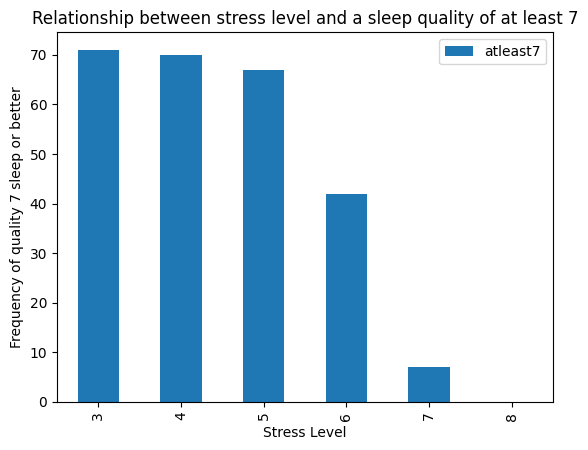

In [11]:
table["atleast7"] = table[7] + table[8] + table[9]
table["atleast7"].plot(kind="bar")
plt.legend()
plt.title("Relationship between stress level and a sleep quality of at least 7")
plt.xlabel("Stress Level")
plt.ylabel("Frequency of quality 7 sleep or better")
plt.show()

In [12]:
import scipy
table = table.drop("atleast7", axis=1)
statistic, pvalue, dof, expected_freq = scipy.stats.chi2_contingency(table)
print(pvalue)

1.0377246812447469e-162


> Since the p value is so much lower than the standard alpha value of 0.05, we are able to reject the null hypothesis and make the statement that there is indeed a significant relationship between stress level and the quality of sleep.

# Machine Learning


In [13]:
sleep_df = sleep_df[["Stress Level", "Quality of Sleep"]]
sleep_df["label"] = (sleep_df["Quality of Sleep"] >= 7).astype(int)
display(sleep_df)

C:\Users\johan\AppData\Local\Temp\ipykernel_46464\3917367429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df["label"] = (sleep_df["Quality of Sleep"] >= 7).astype(int)


,Stress Level,Quality of Sleep,label
0,6,6,0
1,8,6,0
2,8,6,0
3,8,4,0
4,8,4,0
...,...,...,...
369,3,9,1
370,3,9,1
371,3,9,1
372,3,9,1


In [14]:
from sklearn.model_selection import train_test_split
def split_dataset(df, train_size=0.8):
    train_df, test_df = train_test_split(df, train_size=train_size)
    return train_df, test_df

train_df, test_df = split_dataset(sleep_df, train_size=0.8)

# Primary Analysis

A LinearSVC model will be used to classify data. The goal is to be able to classify individuals, based on the amount of stress they experience, into categories describing their sleep quality. People with sleep qualities at least 7, and those below that are put in different categories.

In [15]:
def trainSVM(train_feature_vectors, train_labels, test_feature_vectors, test_labels):

    from sklearn.svm import LinearSVC
    from sklearn.metrics import accuracy_score, classification_report
    
    # Create and train the model
    model = LinearSVC()
    train_feature_vectors_reshaped = train_feature_vectors.reshape(-1,1)
    model.fit(train_feature_vectors_reshaped, train_labels)
    # Make predictions on the test set
    test_feature_vectors_reshaped = test_feature_vectors.reshape(-1,1)
    preds = model.predict(test_feature_vectors_reshaped)
    # Evaluate the model
    accuracy = accuracy_score(test_labels, preds)
    report = classification_report(test_labels, preds)

    print("Accuracy of Linear SVM Model:", accuracy)
    print("Classification Report:\n", report)
    return model, accuracy, report

model, accuracy, report = trainSVM(
    train_df["Stress Level"].values, train_df["label"].values,
    test_df["Stress Level"].values, test_df["label"].values
)

Accuracy of Linear SVM Model: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.98      1.00      0.99        56

    accuracy                           0.99        75
   macro avg       0.99      0.97      0.98        75
weighted avg       0.99      0.99      0.99        75



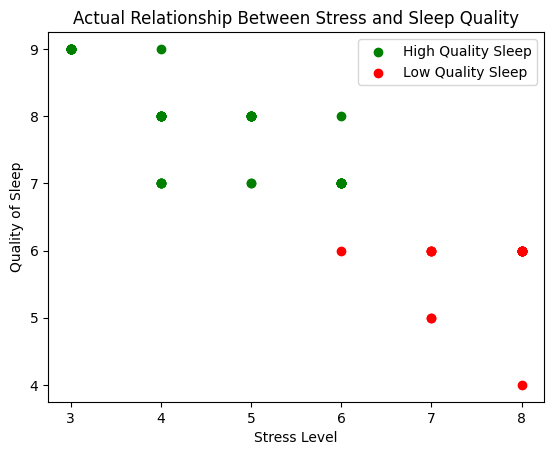

In [16]:
import matplotlib.pyplot as plt
for sleep_quality in test_df["label"].unique():
    of_quality = test_df[test_df["label"] == sleep_quality]
    if sleep_quality == 1:
        quality = "High Quality Sleep"
        color = "green"
    else:
        quality = "Low Quality Sleep"
        color = "red"
    plt.scatter(of_quality["Stress Level"], of_quality["Quality of Sleep"], label=quality, color=color)
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.legend()
plt.title("Actual Relationship Between Stress and Sleep Quality")
plt.show()

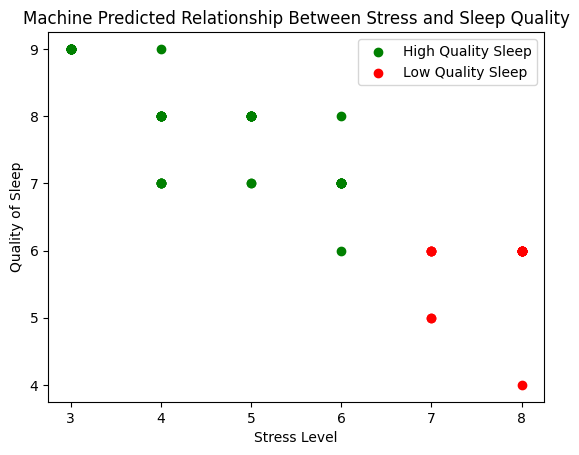

In [17]:
test_df["preds"] = model.predict(test_df["Stress Level"].values.reshape(-1,1))
for sleep_quality in test_df["preds"].unique():
    of_quality = test_df[test_df["preds"] == sleep_quality]
    if sleep_quality == 1:
        quality = "High Quality Sleep"
        color = "green"
    else:
        quality = "Low Quality Sleep"
        color = "red"
    plt.scatter(of_quality["Stress Level"], of_quality["Quality of Sleep"], label=quality, color=color)
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.legend()
plt.title("Machine Predicted Relationship Between Stress and Sleep Quality")
plt.show()

# Conclusion

**<font color="Black">It has been found that there is indeed an inverse relationship between the amount of stress that one experiences and the quality of their sleep. Hypothesis testing allowed us to determine that this relationship was not simply due to chance but rather was quite significant, while the machine learning process trained a model to be able to predict the sleep quality of a given person based on their stress level with an accuracy of 0.99. This enables us to effectively predict what the sleep quality of an individual person, like a college student, will be based on their stress level. This information can lead college students to implement better stress management procedures to avoid facing health complications that arise from unmitigated stress.</font>**